In [25]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rc_file_defaults()

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

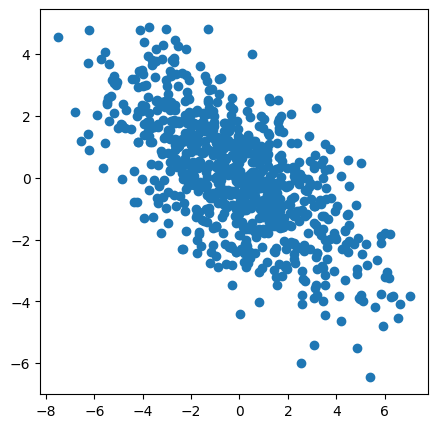

In [2]:
fig, ax = plt.subplots(figsize=(5, 5))

cov = np.array([[6, -3], [-3, 3.5]])
pts = np.random.multivariate_normal([0, 0], cov, size=800)

plt.scatter(*pts.T)

(-0.5, 4.0)

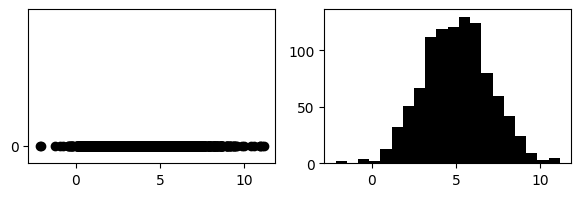

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3 * 2 + 1, 2))

ax = ax1
size = 1000
x = 2 * np.random.randn(size) + 5
y = np.linspace(0, 1, size) * 0
ax1.scatter(x, y, color="k")
ax2.hist(x, color="k", bins=20)

x = 1 * np.random.randn(size) + 2
ax.scatter(x, y, color="k")

ax.set_yticks([0])
ax.set_ylim(-0.5, 4)

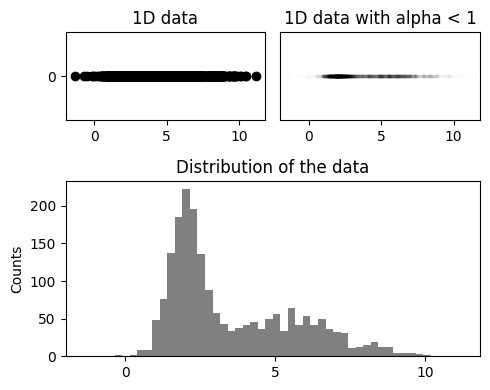

In [4]:
import matplotlib.gridspec as gridspec

# Create a figure object
fig = plt.figure(figsize=(5, 4))

# Define the grid
grid = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[0.5, 1])

# Create first subplot top-left
ax1 = plt.subplot(grid[0])

# Create second subplot, on the top-right
ax2 = plt.subplot(grid[1])

# Create third subplot, at the bottom across full width
ax3 = plt.subplot(grid[2:])

np.random.seed(43)
size = 1000
y = np.linspace(0, 1, size * 2) * 0
x1, x2 = np.random.randn(size) / 2 + 2, 2 * np.random.randn(size) + 5
x = np.concatenate((x1, x2), axis=0)
ax1.scatter(x, y, color="k")
ax2.scatter(x, y, color="k", alpha=0.01, s=5)

ax3.hist(x, color="gray", bins=50)
ax3.set_xticks([0, 5, 10])

ax1.set_yticks([0])
ax1.set_title("1D data")
ax2.set_title("1D data with alpha < 1")
ax3.set_title("Distribution of the data")

ax2.set_yticks([])
ax3.set_ylabel("Counts")

# Show the plot
plt.tight_layout()
plt.savefig(figures_path / "1d_histograms_theory.png", bbox_inches="tight", dpi=300)
plt.show()

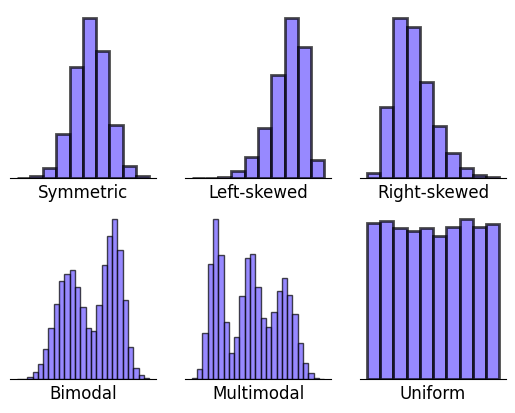

In [84]:
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
import numpy as np

color = matplotlib.colors.to_rgb("#6B57FF")

fig, axs = plt.subplots(2, 3)

ax = axs[0][0]
a, mu, sigma = 0, 0, 1
num_samples = 10000
data = skewnorm(a, mu, sigma).rvs(num_samples)
ax.hist(data, bins=10, alpha=0.7, density=True, edgecolor="k", facecolor=color, lw=2)

ax = axs[0][1]
a, mu, sigma = -4, 0, 1
num_samples = 10000
data = skewnorm(a, mu, sigma).rvs(num_samples)
ax.hist(data, bins=10, alpha=0.7, density=True, edgecolor="k", facecolor=color, lw=2)

ax = axs[0][2]
a, mu, sigma = 4, 0, 1
num_samples = 10000
data = skewnorm(a, mu, sigma).rvs(num_samples)
ax.hist(data, bins=10, alpha=0.7, density=True, edgecolor="k", facecolor=color, lw=2)


ax = axs[1][0]
a, mu, sigma = 0, 0, 1
num_samples = 10000
data = list(skewnorm(a, mu, sigma).rvs(num_samples)) + list(skewnorm(a, mu + 3, sigma / 1.5).rvs(num_samples))
ax.hist(data, bins=25, facecolor=color, edgecolor="k", alpha=0.7, density=True)


ax = axs[1][1]
a, mu, sigma = 0, 0, 1
num_samples = 10000

data = [
    *skewnorm(
        a,
        mu,
        sigma / 5,
    ).rvs(num_samples),
    *skewnorm(
        a,
        mu + 1,
        sigma / 4,
    ).rvs(num_samples),
    *skewnorm(
        a,
        mu + 2,
        sigma / 3,
    ).rvs(num_samples),
]

ax.hist(data, bins=25, facecolor=color, edgecolor="k", alpha=0.7, density=True)

ax = axs[1][2]
num_samples = 10000
data = np.random.rand(num_samples)
ax.hist(data, bins=10, facecolor=color, alpha=0.7, density=True, edgecolor="k", lw=2)

labels = [["Symmetric", "Left-skewed", "Right-skewed"], ["Bimodal", "Multimodal", "Uniform"]]
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_xlabel(labels[i][j], fontsize=12)
        ax.spines[["right", "top", "left"]].set_visible(False)


fig.savefig("figures/different_distribution.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()

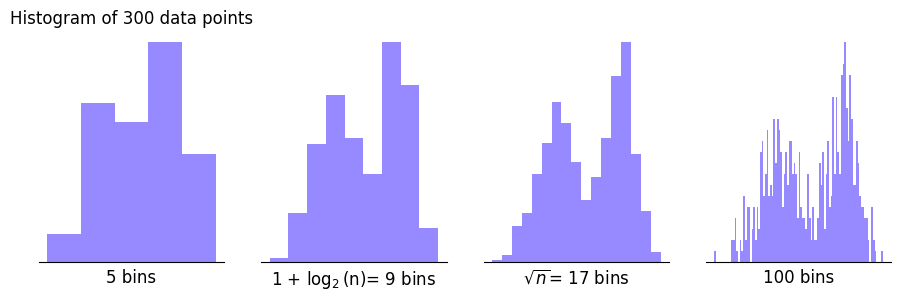

In [133]:
fig, axs = plt.subplots(1, 4, figsize=(11, 3))


a, mu, sigma = 0, 0, 1
num_samples = 300
np.random.seed(42)
data = list(skewnorm(a, mu, sigma).rvs(num_samples)) + list(skewnorm(a, mu + 3, sigma / 1.5).rvs(num_samples))

bins = [5, int(1 + np.log2(num_samples)), int(np.sqrt(num_samples)), 100]
for i, ax in enumerate(axs):
    ax.hist(data, bins=bins[i], facecolor=color, alpha=0.7, density=True)

    if i == 1:
        ax.set_xlabel(f"1 + $\log_2$(n)" f"= {bins[i]} bins", fontsize=12)
    elif i == 2:
        ax.set_xlabel(r"$\sqrt{n}$" + f"= {bins[i]} bins", fontsize=12)
    else:
        ax.set_xlabel(f"{bins[i]} bins", fontsize=12)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines[["right", "top", "left"]].set_visible(False)

axs[0].set_title(f"Histogram of {num_samples} data points")
fig.savefig("figures/different_bins.png", dpi=300, bbox_inches="tight")

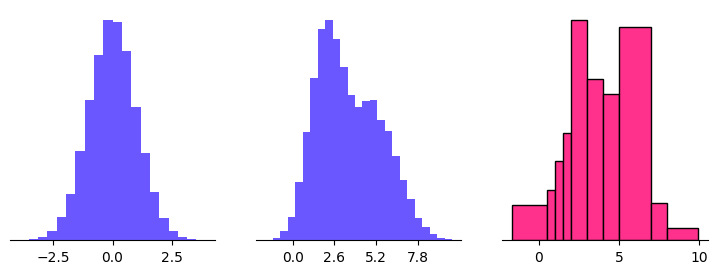

In [185]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
color = matplotlib.colors.to_rgb("#6B57FF")

np.random.seed(42)
num_samples = 10000
data = np.random.randn(num_samples)

ax = axs[0]
ax.set_yticks([])
ax.hist(data, bins=20, color=color)

ax.spines[["right", "top", "left"]].set_visible(False)

ax = axs[1]
data = list(skewnorm(a, mu + 2, sigma).rvs(num_samples)) + list(skewnorm(a, mu + 5, sigma * 1.5).rvs(num_samples))
ax.hist(data, bins=25, color=color)
ax.set_xticks([0, 2.6, 5.2, 7.8])


ax = axs[2]
color = matplotlib.colors.to_rgb("#FF318C")
bins = [np.min(data), 0.5, 1.0, 1.5, 2.0, 3, 4, 5, 7, 8, np.max(data)]
hist, edges = np.histogram(data, bins=bins)
centers = (edges[:-1] + edges[1:]) / 2
widths = np.diff(edges)
ax.bar(centers, hist, align="center", width=widths, edgecolor="k", color=color)

for ax in axs:
    ax.set_yticks([])
    ax.spines[["right", "top", "left"]].set_visible(False)

fig.savefig("figures/bad_bins.png", dpi=300, bbox_inches="tight")

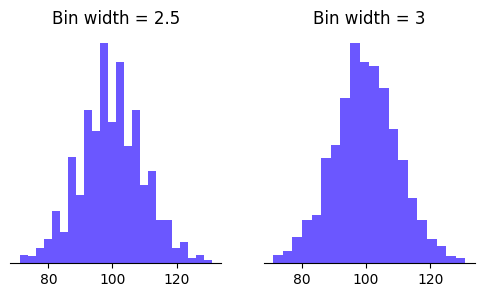

In [256]:
np.random.seed(44)
data = np.random.poisson(100, size=1000)
color = matplotlib.colors.to_rgb("#6B57FF")

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

for ax in axs:
    ax.set_yticks([])
    ax.spines[["right", "top", "left"]].set_visible(False)

for i, binwidth in enumerate((2.5, 3)):
    axs[i].set_title(f"Bin width = {binwidth}")
    axs[i].hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), color=color)

fig.savefig("figures/bad_bins_width.png", dpi=300, bbox_inches="tight")